## ¿Se asignaron de manera equitativa los botes salvavidas del Titanic?


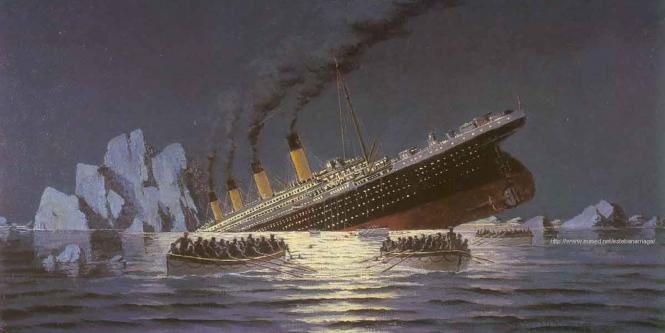

Hay mucha controvercia con respecto a la "asignación desigual" de los botes salvavidas en la desgracia del Titanic. Recordemos que en la pelicula se dijo "mujeres y niños primero". En ésta también se mostró como algunos magnates usaron sus influencias para escapar primero dejando en desventaja a las clases menos adineradas. Personalmente yo creo que en el completo caos que se susitaba en ese momento no se contaba con el tiempo ni para hacer un reparto igual de oportunidades de supervivencia ni para favorecer a unos pocos, sino que fue mas bien un "salvece quien pueda". Pero no podemos vivir de opiniones o especulaciones, es por eso que en esta ocasión analizaremos el dataset del Titanic para ver si todo lo anterior dicho tiene fundamento estadistico o son solo suposiciones.

In [132]:
# Importemos librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sb

# Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

In [133]:
# Cargemos el dataset
data = sb.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [134]:
# Hagamos un subdataframe con las variabels de interes
variables = ['sex','age','class','alive']
df = data[variables]
df.head()

,sex,age,class,alive
0,male,22.0,Third,no
1,female,38.0,First,yes
2,female,26.0,Third,yes
3,female,35.0,First,yes
4,male,35.0,Third,no


### 1. Limpieza del dataframe

In [135]:
# Length del dataset antes de la limpieza
print('El numero de filas es:',df.shape[0]) 

# Vemos si hay nulos y cuantos hay por columna:
df.isnull().sum()

El numero de filas es: 891


sex        0
age      177
class      0
alive      0
dtype: int64

In [136]:
# Para no falsear datos dropiemos los nulos
df = df.dropna(how='any',axis=0)

# Como solo haremos estudio de frecuencias no limpiaremos datos duplicados siendo que su presencia no nos afecta.

# Length del dataset despues de la dropeada
print('El numero de filas después de quitar los NaN es:',df.shape[0])

El numero de filas después de quitar los NaN es: 714


### 2. Análisis Exploratorio

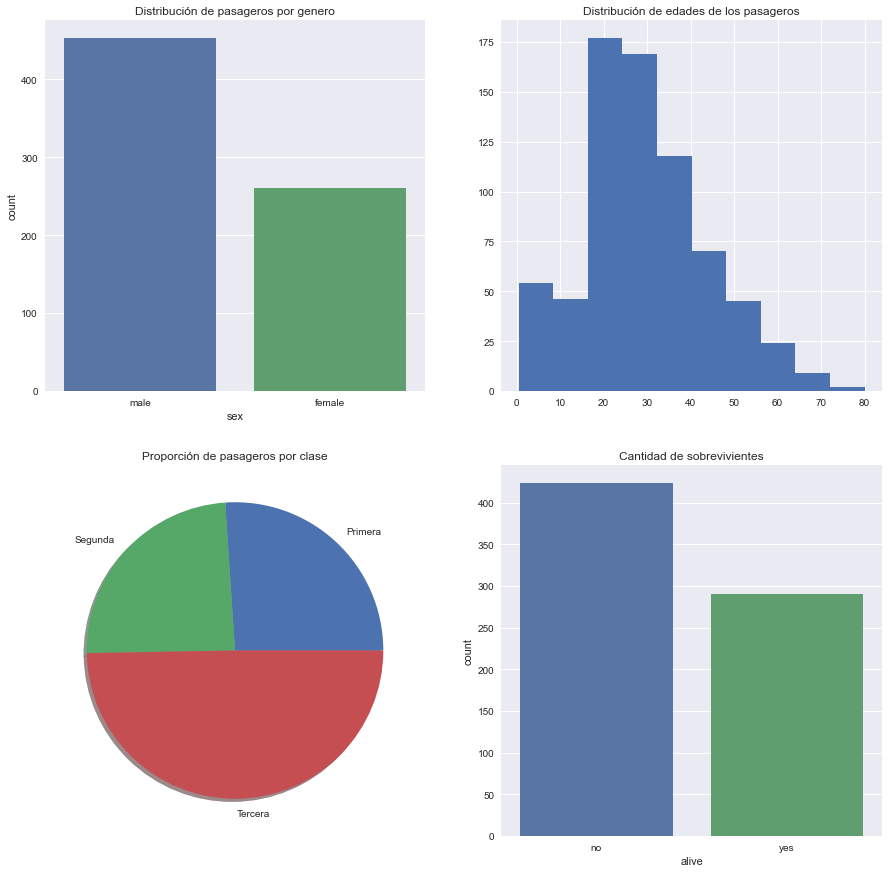

In [137]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sb.countplot('sex', data=df)
plt.title('Distribución de pasageros por genero')

plt.subplot(2,2,2)
plt.hist(df['age'])
plt.title('Distribución de edades de los pasageros')

plt.subplot(2,2,3)
cantidades = df.groupby('class').count().T.sum().tolist()
clase = ['Primera','Segunda','Tercera']
plt.pie(cantidades,labels=clase, shadow=True)
plt.title('Proporción de pasageros por clase')

plt.subplot(2,2,4)
sb.countplot('alive', data=df)
plt.title('Cantidad de sobrevivientes')

plt.show()

**Observaciones**

- La mayoria de los pasageros eran hombres
- La mayoria de los pasageros eran adultos de mediana edad
- La mayoria de los pasageros viajaban en tercera clase
- La mayoria de los pasageros no sobrevivieron

### 3. Análisis de desigualdad

Para saber si realmente hubo injusticia en la asignación de botes salvavidas dezglocemos la pregunta inicial en las siguientes tres:

- ¿Realmente dieron prioridad a las mujeres a la hora del reparto?
- ¿Realmente dieron prioridad a los niños a la hora del reparto?
- ¿Tuvieron los de primera clase venta sobre las otras dos?

Para responder a la primera pregunta debemos analizar la relación entre las variables "Genero" y "Supervivencia".

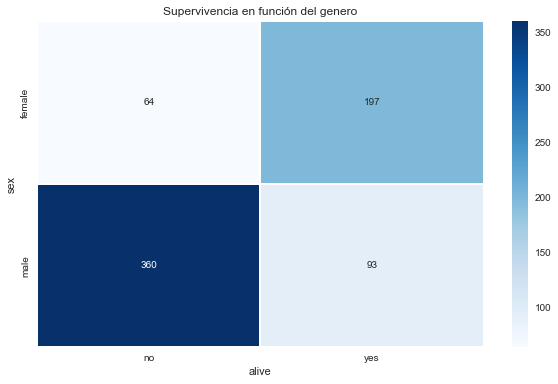

In [138]:
# En el dataset estas variables son "sex" y "alive". Hagamos un estudio de frecuencias conjuntas para ellas:
supervivencia_segun_genero = pd.crosstab(df['sex'],df['alive'])
plt.figure(figsize=(10,6))
sb.heatmap(supervivencia_segun_genero, annot=True, fmt='d',
           cmap='Blues', linewidth=2 )
plt.title('Supervivencia en función del genero')
plt.show()

**Observaciones**
- 197 de 261 mujeres (el 75% de las mujeres) sobrevivieron
- 93 de 453 hombres (el 20% de los hombres) sobrebivieron

Un mayor porcentaje de mujeres sobrevivió a la tragedia ¿será ésto una prueba de que hubo discriminación por sexo?

El afirmar que hubo discriminación por sexo es equivalente a decir que las variables "Genero" y "Supervivencia" estan relacionadas, sin embargo, al ser estas dos variables categoricas no podemos hacer un scatterplot para ver si hay correlación, lo que se debe hacer es un contraste de independencia como el siguiente:

$$
\left\{
\begin{array}{ll}
H_0:\ El\ genero\ del \ pasagero\ es\ independiente\ de\ si\ sobrevive\ o\  no\\ 
H_1:\ El\ genero\ del \ pasagero\ SI\ depende\ de\ si\ sobrevive\ o\  no\\ 
\end{array}
\right.
$$

In [139]:
# El contraste que usaremos es el de la chi cuadrado usando la libreria scipy
from scipy.stats import chi2_contingency

contraste = chi2_contingency(supervivencia_segun_genero)

print('El p-valor es:',contraste[1])
print()
if contraste[1]>0.1:
  print('Dado que el p-valor es mayor que el nivel de significación (10%) aceptamos la hipotesis nula')
  print('Es decir, el estudio concluye que el hecho de que el pasagero sobreviva o no NO depende del su genero')
else:
  print('Dado que el p-valor es menor que el nivel de significación (10%) rechazamos la hipotesis nula')
  print('Es decir, el estudio concluye que el que el pasagero sobreviva o no SI depende de si es hombre o mujer')

El p-valor es: 1.6716678441395297e-46

Dado que el p-valor es menor que el nivel de significación (10%) rechazamos la hipotesis nula
Es decir, el estudio concluye que el que el pasagero sobreviva o no SI depende de si es hombre o mujer


Para responder la segunda pregunta hagamos el mismo analisis para las variables "Edad" y "Supervivencia".

In [140]:
# Si bien la variable "Supervivencia" es categorica, "Edad" es categorica. Para poder relacionarlas debemos agrupar los
# Rangos de edades por categorias, ya sea: 
# - 1) niño, adolecente, adulto, anciano
# - 2) niño, adulto, anciano
# - 3) niño, adolecente, adulto
# - 4) niño, adulto

# Hay muchas categorias que se pueden proponer, pero para fines de este analisis lo que importa responder es la pregunta:
# ¿tuvieron los niños prioridad sobre los adultos durante la tragedia? es por eso que agruparemos segun la opción 4.

intervalos = [ min(df['age']) , 15 , max(df['age']) ]
categorias = [ 'child', 'adult']
df['type'] = pd.cut(df['age'], bins=intervalos , labels=categorias)
datos = df.drop(['age'], axis=1)

In [141]:
datos.head()

,sex,class,alive,type
0,male,Third,no,adult
1,female,First,yes,adult
2,female,Third,yes,adult
3,female,First,yes,adult
4,male,Third,no,adult


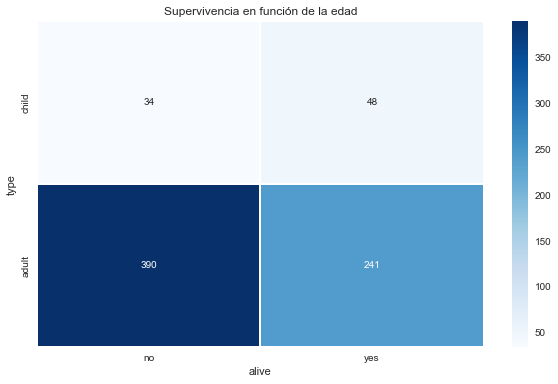

In [147]:
# Haciendo el mapa de calor para las variables "alive" y "type"
supervivencia_segun_edad = pd.crosstab(df['type'],df['alive'])
plt.figure(figsize=(10,6))
sb.heatmap(supervivencia_segun_edad, annot=True, fmt='d',
           cmap='Blues', linewidth=2 )
plt.title('Supervivencia en función de la edad')
plt.show()

**Observaciones**
- 241 de 631 adultos (el 38% de los adultos) sobrevivieron
- 48 de 82 niños (el 58% de los niños) sobrevivieron

Vemos que se salvo un mayor porcentaje de niños que de adultos en la tragedia del Titanic, sin embargo ¿es esto evidencia suficiente para asegurar que el famoso dialogo "niños primero" es cierto?

Hagamos el siguiente contraste:
$$
\left\{
\begin{array}{ll}
H_0:\ El\ que\ sobreviva \ el\ pasagero\ es\ independiente\ de\ su\ edad\\
H_1:\ El\ que\ sobreviva \ el\ pasagero\ SI\ depende\ de\ su\ edad\\ 
\end{array}
\right.
$$

In [149]:
contraste = chi2_contingency(supervivencia_segun_edad)

print('El p-valor es:',contraste[1])
print()
if contraste[1]>0.1:
  print('Dado que el p-valor es mayor que el nivel de significación (10%) aceptamos la hipotesis nula')
  print('Es decir, el estudio concluye que el hecho de que el pasagero sobreviva o no no depende del su edad')
else:
  print('Dado que el p-valor es menor que el nivel de significación (10%) rechazamos la hipotesis nula')
  print('Es decir, el estudio concluye que el que el pasagero sobreviva o no SI depende de su edad')

El p-valor es: 0.0006489458763022027

Dado que el p-valor es menor que el nivel de significación (10%) rechazamos la hipotesis nula
Es decir, el estudio concluye que el que el pasagero sobreviva o no SI depende de su edad


Hasta este momento los contrastes de independencia al 90% para las variables "Genero vs Supervivencia" y "Edad vs Supervivencia" han dado positivo, por lo que tenemos evidencias estadisticas para afirmar que el famoso parlamento "***Mujeres y niños primero***" fue cierto.

Finalmente, respondamos a la pregunta ***¿tuvieron los de primera clase algún tipo de ventaja?***

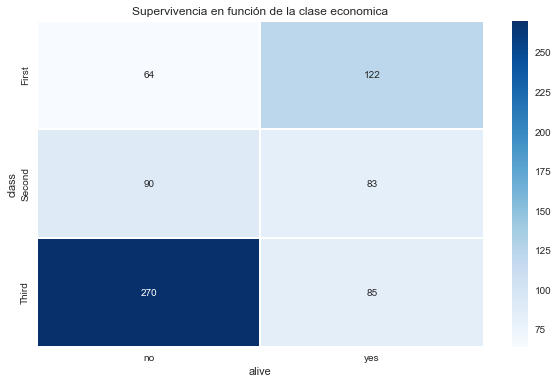

In [151]:
# El mapa de calor para las variables "class" y "alive"
supervivencia_segun_clase = pd.crosstab(df['class'],df['alive'])
plt.figure(figsize=(10,6))
sb.heatmap(supervivencia_segun_clase, annot=True, fmt='d',
           cmap='Blues', linewidth=2 )
plt.title('Supervivencia en función de la clase economica')
plt.show()

**Observaciones**
- En primera clase el 65% de la gente se salvó
- En segunda clase el 48% de la gente se salvó
- En tercera clase el 23% de la gente se salvó

A simple vista pareciera ser que los más adinerados tuvieron ventaja, hagamos el contraste de independencia para estar seguros:

$$
\left\{
\begin{array}{ll}
H_0:\ El\ que\ sobreviva \ el\ pasagero\ es\ independiente\ de\ su\ clase\\
H_1:\ El\ que\ sobreviva \ el\ pasagero\ SI\ depende\ de\ su\ clase\\ 
\end{array}
\right.
$$

In [155]:
contraste = chi2_contingency(supervivencia_segun_clase)

print('El p-valor es:',contraste[1])
print()
if contraste[1]>0.1:
  print('Dado que el p-valor es mayor que el nivel de significación (10%) aceptamos la hipotesis nula')
  print('Es decir, el estudio concluye que el hecho de que el pasagero sobreviva o no no depende del la clase')
else:
  print('Dado que el p-valor es menor que el nivel de significación (10%) rechazamos la hipotesis nula')
  print('Es decir, el estudio concluye que el que el pasagero sobreviva o no SI depende de la clase')

El p-valor es: 6.709861749756909e-21

Dado que el p-valor es menor que el nivel de significación (10%) rechazamos la hipotesis nula
Es decir, el estudio concluye que el que el pasagero sobreviva o no SI depende de la clase


## Conclusión

- El contraste de independecia a 90% de confianza indica que el reparto de botes salvavidas dió preferencia a mujeres y niños.
- El contraste de independencia al 90% de confianza indica que los de primera clase tuvieron ventaja sobre el resto.

**Análisis llevado a cabo por**:

*Roberto Araujo*.